<a href="https://colab.research.google.com/github/dilip-ksa/dilip_ml_pythondemo/blob/main/Data_Visualization_python_Aug2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

arr = np.array([10,20,30,40]) # array element separated by space
print(type(arr))
print(arr)

<class 'numpy.ndarray'>
[10 20 30 40]


In [8]:
import pandas as pd
import numpy as np
import pickle
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
print('import complete')

import complete


In [7]:
# This dataset is of type dataframe. Let's assign this dataset to a variable, so that we can manipulate it freely.
df = pd.read_csv("diabetes.csv")
print(type(df))
print(len(df))

<class 'pandas.core.frame.DataFrame'>
768


In [10]:
# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)

data_dir = str(main_dir) + "/data"
print(data_dir)

plot_dir = str(main_dir) + "/plots"
if not os.path.exists(plot_dir):
  os.makedirs(plot_dir)
print(plot_dir)

# This dataset is of type dataframe. Let's assign this dataset to a variable, so that we can manipulate it freely.
df = pd.read_csv(str(data_dir)+"/"+ "diabetes.csv")

print(type(df))
print(len(df))

/
//data
//plots


FileNotFoundError: [Errno 2] No such file or directory: '//data/diabetes.csv'

In [11]:
# This dataset is of type dataframe. Let's assign this dataset to a variable, so that we can manipulate it freely.
df = pd.read_csv("diabetes.csv")
print(type(df))
print(len(df))

<class 'pandas.core.frame.DataFrame'>
768


In [12]:
df_subset = df[['DiabetesPedigreeFunction', 'Age', 'BloodPressure', 'Insulin', 'Glucose', 'BMI',
'SkinThickness', 'Outcome', 'Pregnancies']]
print(df_subset.head())

   DiabetesPedigreeFunction  Age  BloodPressure  Insulin  Glucose   BMI  \
0                     0.627   50             72        0      148  33.6   
1                     0.351   31             66        0       85  26.6   
2                     0.672   32             64        0      183  23.3   
3                     0.167   21             66       94       89  28.1   
4                     2.288   33             40      168      137  43.1   

   SkinThickness  Outcome  Pregnancies  
0             35        1            6  
1             29        0            1  
2              0        1            8  
3             23        0            1  
4             35        1            0  


In [13]:
col_dict = df_subset.nunique().to_dict()
grouping_col = min(col_dict, key=col_dict.get)
# Group data by variable with min levels.
grouped = df_subset.groupby(grouping_col)

In [14]:
# Compute mean on the listed variables using the grouped data.
df_grouped_mean = grouped.mean()[['DiabetesPedigreeFunction', 'Age', 'BloodPressure', 'Insulin',
'Glucose', 'BMI', 'SkinThickness']]
print(df_grouped_mean)

         DiabetesPedigreeFunction        Age  BloodPressure     Insulin  \
Outcome                                                                   
0                        0.429734  31.190000      68.184000   68.792000   
1                        0.550500  37.067164      70.824627  100.335821   

            Glucose        BMI  SkinThickness  
Outcome                                        
0        109.980000  30.304200      19.664000  
1        141.257463  35.142537      22.164179  


In [15]:
# Reset index of the dataset.
df_grouped_mean = df_grouped_mean.reset_index()
print(df_grouped_mean)

   Outcome  DiabetesPedigreeFunction        Age  BloodPressure     Insulin  \
0        0                  0.429734  31.190000      68.184000   68.792000   
1        1                  0.550500  37.067164      70.824627  100.335821   

      Glucose        BMI  SkinThickness  
0  109.980000  30.304200      19.664000  
1  141.257463  35.142537      22.164179  


In [16]:
# Melt the wide data into long.
df_grouped_mean_long = pd.melt(df_grouped_mean, #<- wide dataset
id_vars = [grouping_col], #<- identifying variable
var_name = 'metric', #<- contains col names of wide data
value_name = 'mean') #<- contains values from above columns
print(df_grouped_mean_long)

    Outcome                    metric        mean
0         0  DiabetesPedigreeFunction    0.429734
1         1  DiabetesPedigreeFunction    0.550500
2         0                       Age   31.190000
3         1                       Age   37.067164
4         0             BloodPressure   68.184000
5         1             BloodPressure   70.824627
6         0                   Insulin   68.792000
7         1                   Insulin  100.335821
8         0                   Glucose  109.980000
9         1                   Glucose  141.257463
10        0                       BMI   30.304200
11        1                       BMI   35.142537
12        0             SkinThickness   19.664000
13        1             SkinThickness   22.164179


In [18]:
# Melt the long data into wide.
df_grouped_mean_wide = df_grouped_mean_long.pivot(
index = [grouping_col], #<- identifying variable
columns = 'metric', #<- col names of wide data
values = 'mean') #<- values from above columns
print(df_grouped_mean_wide)

metric         Age        BMI  BloodPressure  DiabetesPedigreeFunction  \
Outcome                                                                  
0        31.190000  30.304200      68.184000                  0.429734   
1        37.067164  35.142537      70.824627                  0.550500   

metric      Glucose     Insulin  SkinThickness  
Outcome                                         
0        109.980000   68.792000      19.664000  
1        141.257463  100.335821      22.164179  


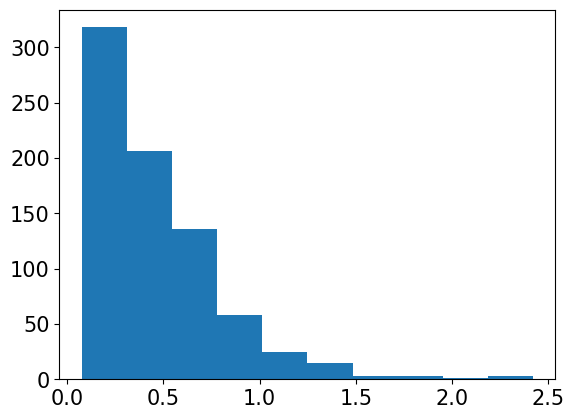

In [24]:
plt.rcParams.update({'font.size': 15})
plt.hist(df_subset['DiabetesPedigreeFunction'])
plt.show()

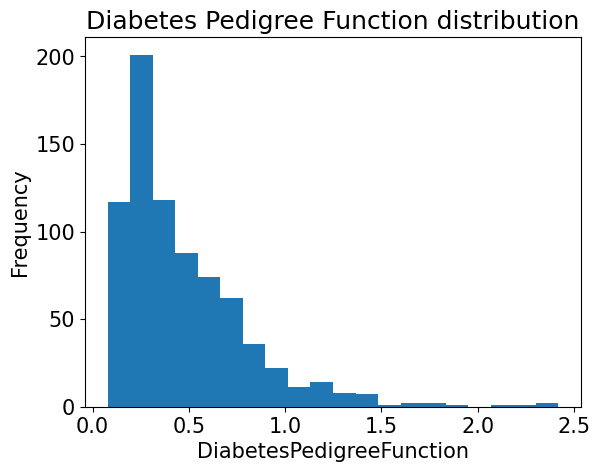

In [25]:
plt.hist(df_subset['DiabetesPedigreeFunction'],bins = 20)
plt.xlabel('DiabetesPedigreeFunction') #<- label x-axis
plt.ylabel('Frequency') #<- label y-axis
plt.title('Diabetes Pedigree Function distribution') #<- add plot title
plt.show()

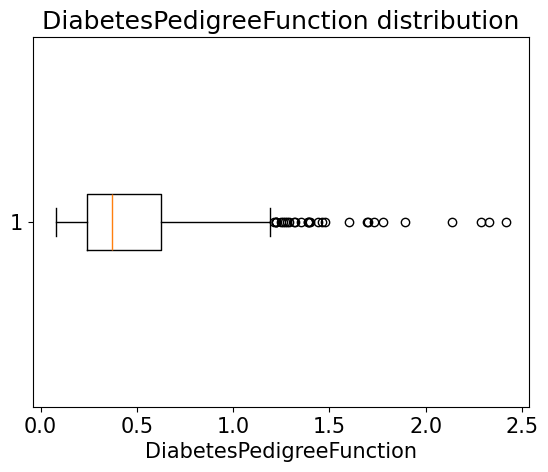

In [26]:
plt.boxplot(df_subset['DiabetesPedigreeFunction'], vert = False)
plt.xlabel('DiabetesPedigreeFunction') #label x-axis
plt.title('DiabetesPedigreeFunction distribution') # add plot title
plt.show()

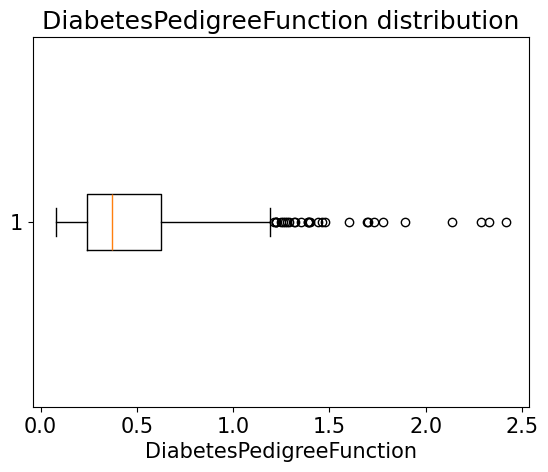

In [28]:
plt.boxplot(df_subset['DiabetesPedigreeFunction'], vert = False)
plt.xlabel('DiabetesPedigreeFunction')       # label x-axis
plt.title('DiabetesPedigreeFunction distribution')      # add plot title
plt.show()

In [29]:
#### Slide 27/34: Univariate plots: bar chart (cont'd)  ####

print(df_grouped_mean_long.head())

   Outcome                    metric       mean
0        0  DiabetesPedigreeFunction   0.429734
1        1  DiabetesPedigreeFunction   0.550500
2        0                       Age  31.190000
3        1                       Age  37.067164
4        0             BloodPressure  68.184000


In [30]:
#### Slide 28/34: Univariate plots: bar chart (cont'd)  ####

query = 'Outcome' + "==" + str('0')
df_false_means = df_grouped_mean_long.query(query)[['metric','mean']]
print(df_false_means)

                      metric        mean
0   DiabetesPedigreeFunction    0.429734
2                        Age   31.190000
4              BloodPressure   68.184000
6                    Insulin   68.792000
8                    Glucose  109.980000
10                       BMI   30.304200
12             SkinThickness   19.664000


In [32]:
#### Slide 29/34: Univariate plots: bar chart (cont'd)  ####

bar_labels = df_false_means['metric']     #<- 1
bar_heights = df_false_means['mean']      #<- 2
num_bars = len(bar_heights)
bar_positions = np.arange(num_bars)      #<- 3

Text(0.5, 1.0, 'Columns and their means')

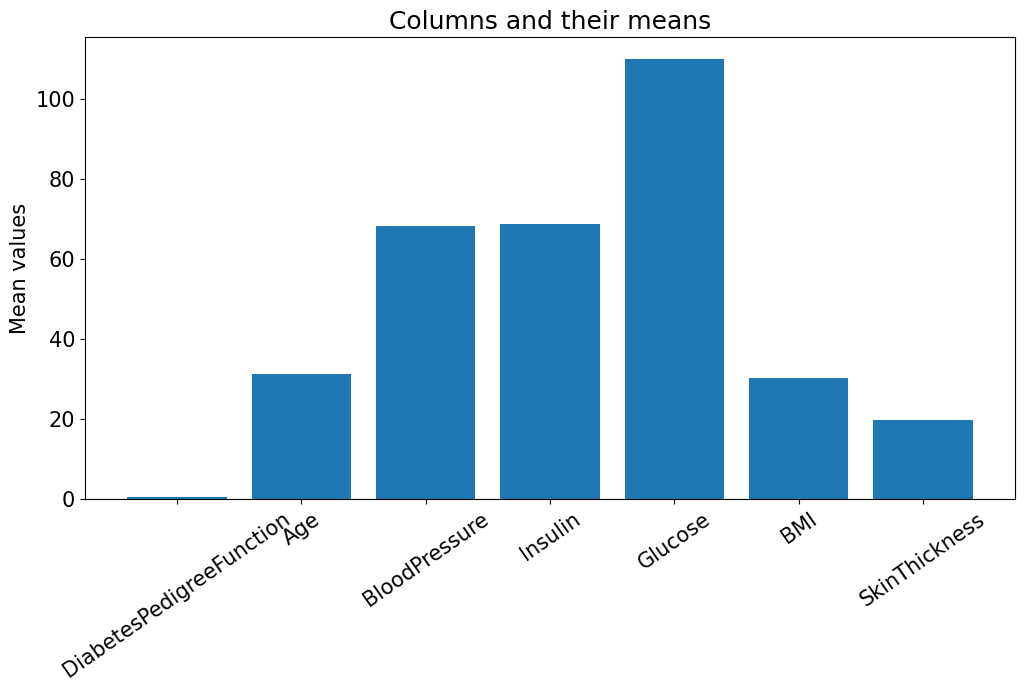

In [35]:
#### Slide 30/34: Univariate plots: bar chart (cont'd)  ####

plt.figure(figsize = (12, 6))
plt.bar(bar_positions, bar_heights)
plt.xticks(bar_positions,bar_labels,rotation = 35)
plt.ylabel('Mean values')
plt.title('Columns and their means')  #<- add plot title